#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [2]:
prepare.prep_info()

This file houses the following functions:
superstore_prep()
opsd_germ_prep()


In [3]:
acquire.acquire_info()

This file houses the following functions:
get_germany_data()
get_swapi_data(endpoint)


# Exercise


Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [4]:
# load superstore csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [5]:
df = prepare.superstore_prep(df)

In [6]:
df.shape

(913000, 19)

In [7]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,Tuesday,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,25.16


### Data split

In [8]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n) 
test_start_index

639100

In [9]:
train = df.iloc[:test_start_index] # end at the test_start_index
test = df.iloc[test_start_index:] # start at the test_start_index

In [10]:
train.shape

(639100, 19)

In [11]:
test.shape

(273900, 19)

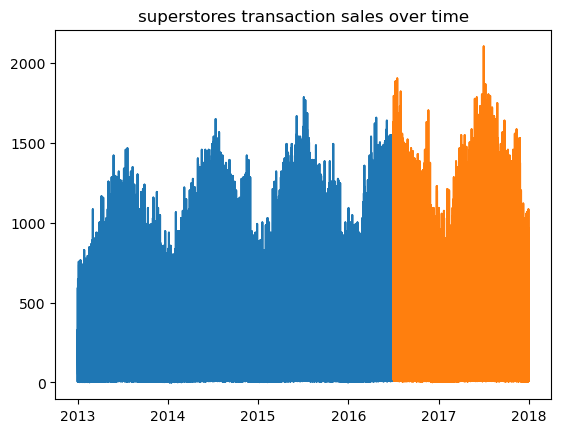

In [12]:
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('superstores transaction sales over time')
plt.show()

### Eyes on target

In [13]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

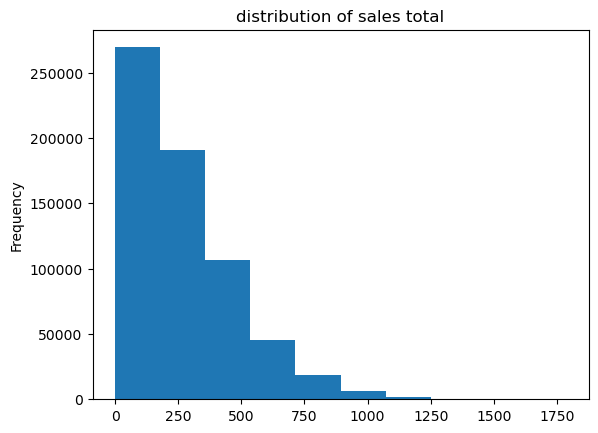

In [14]:
train.sales_total.plot.hist()
plt.title('distribution of sales total')
plt.show()

### Without time

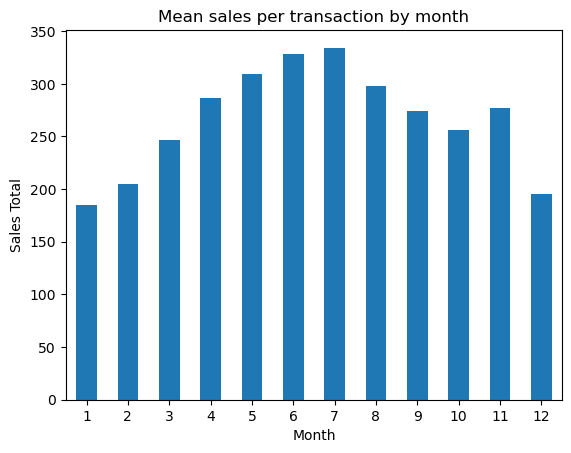

In [46]:
train.groupby(train.index.month).sales_total.mean().plot.bar().tick_params('x', rotation=0)
plt.title('Mean sales per transaction by month')
plt.xlabel('Month')
plt.ylabel('Sales Total')
plt.show()

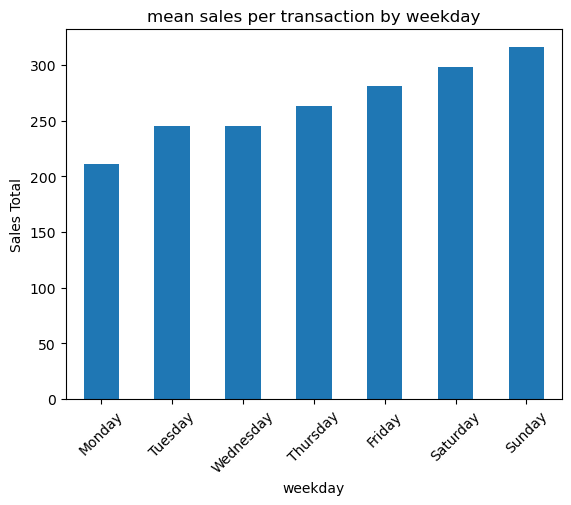

In [49]:
train.groupby('weekday').mean().sort_values('day_of_week').sales_total.plot.bar().tick_params('x', rotation=45)
plt.title('mean sales per transaction by weekday')
plt.ylabel('Sales Total')
plt.show()

### target movement

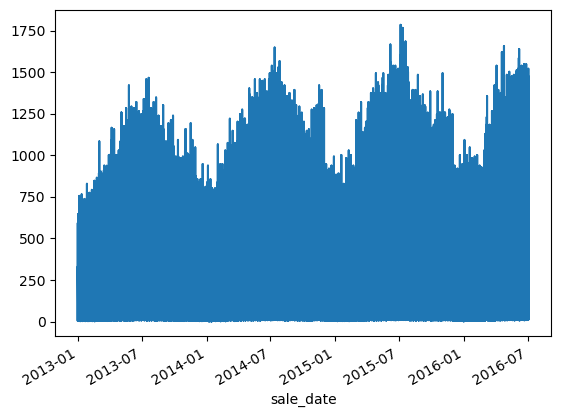

In [44]:
y.plot();

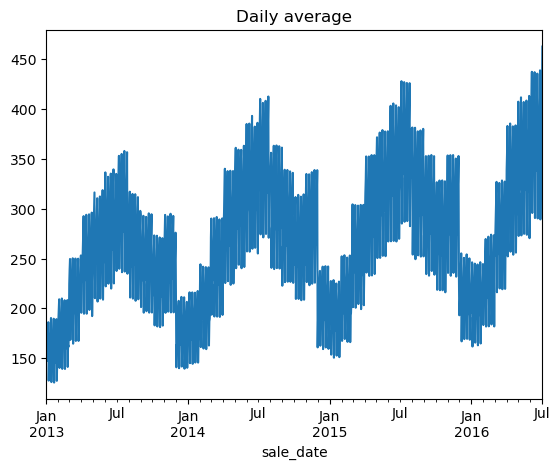

In [57]:
y.resample('D').mean().plot(title='Daily average');

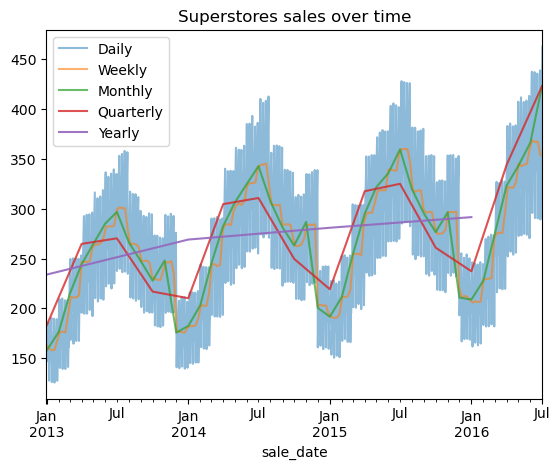

In [64]:
# y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.6, label='Weekly')
y.resample('M').mean().plot(alpha=0.7, label='Monthly')
y.resample('Q').mean().plot(alpha=0.8, label='Quarterly')
y.resample('Y').mean().plot(alpha=0.9, label='Yearly')

plt.title('Superstores sales over time')
plt.legend()
plt.show()

Q1 is superstores strongest of the year  
Q2 mostly flattens out but increases slightly  
Q3 is worst performance with a sharp decline  
Q4 still declines but not as fast as Q3

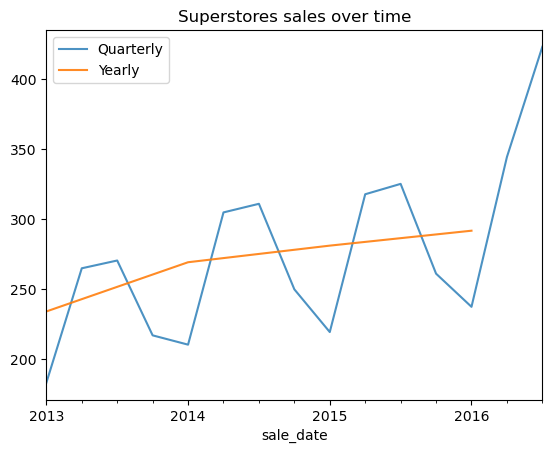

In [65]:
y.resample('Q').mean().plot(alpha=0.8, label='Quarterly')
y.resample('Y').mean().plot(alpha=0.9, label='Yearly')
plt.title('Superstores sales over time')
plt.legend()
plt.show()

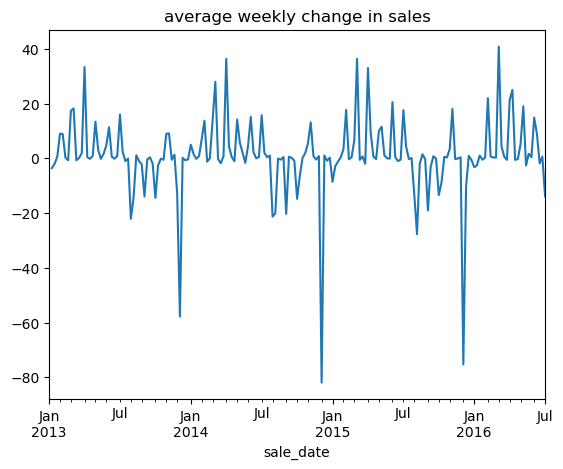

In [67]:
y.resample('W').mean().diff().plot(title='average weekly change in sales')
plt.show()

November is helping to flatten the curve at the end of the year.

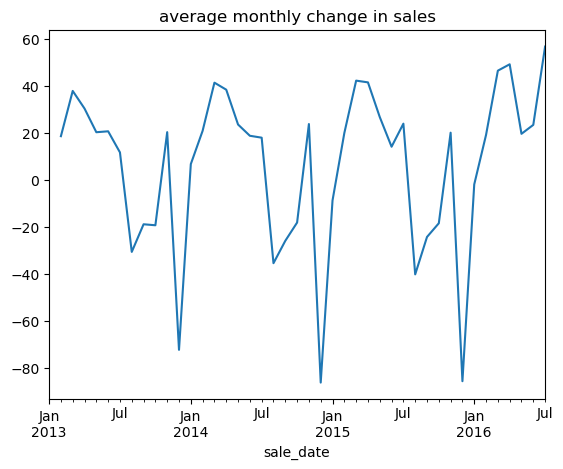

In [68]:
y.resample('M').mean().diff().plot(title='average monthly change in sales')
plt.show()

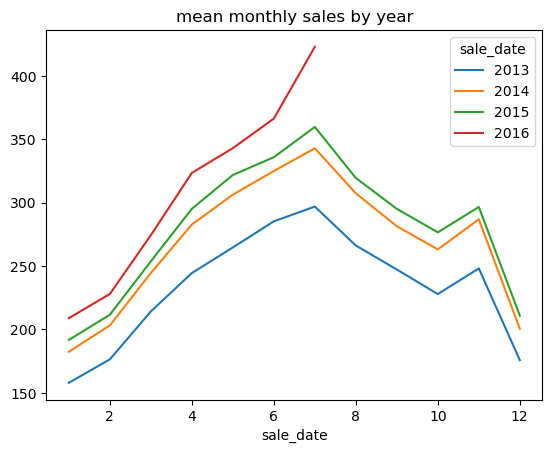

In [73]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly sales by year')
plt.show()

In [74]:
table =y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,422.947300,NaN,NaN,NaN,NaN,NaN


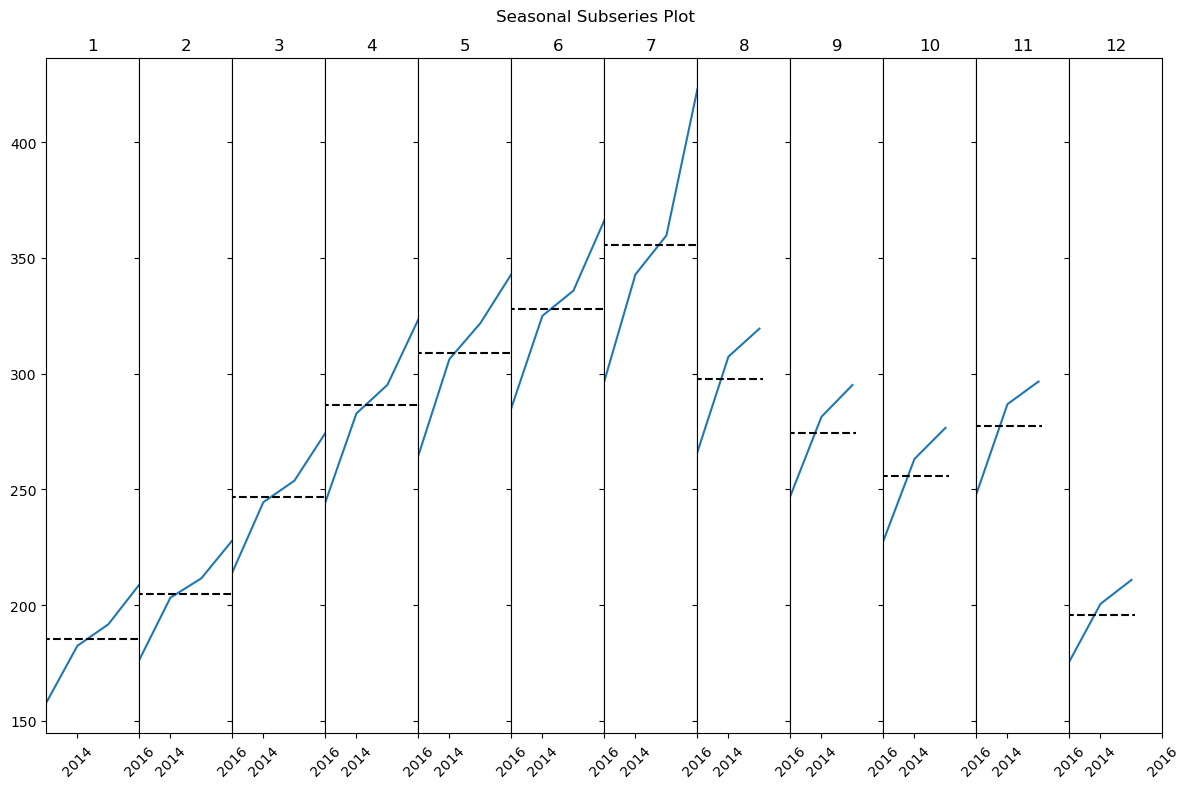

In [81]:
# unpacking figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, figsize=(12,8))

# for ax, (month, subset)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set_xlim(2013, 2016)
    ax.set(xlabel='')
    ax.tick_params('x', rotation=45)
# super-title for the overall figure
fig.suptitle('Seasonal Subseries Plot')
# bringing plots together
fig.tight_layout()
# take out white spaces between plots
fig.subplots_adjust(wspace=0)

**Takeaway:**  
Mean sales are increasing year over year

In [82]:
train['y(t + 1)'] = train.sales_total.shift(-1)
train.head()

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_37582/3812100420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.sales_total.shift(-1)


,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,weekday,sales_total,y(t + 1)
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,Tuesday,10.92,30.16
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,30.16,308.48
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,Tuesday,308.48,197.55
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,197.55,25.16
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,25.16,162.98


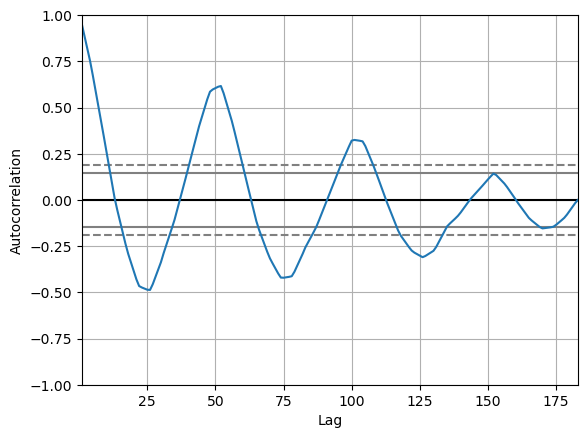

In [84]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

## Germany

In [85]:
df = acquire.get_germany_data()

Found CSV


In [86]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [87]:
df = prepare.opsd_germ_prep(df)

In [93]:
df.sample(10)

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-05-21,1050.170,0.000,0.000,0.000,5,2006
2009-08-31,1239.968,0.000,0.000,0.000,8,2009
2014-10-28,1506.889,118.568,61.658,180.226,10,2014
2012-04-22,1063.047,89.137,87.018,176.155,4,2012
2010-04-23,1293.380,30.826,0.000,0.000,4,2010
2012-08-23,1314.028,61.385,144.194,205.579,8,2012
2014-02-20,1564.341,182.761,70.129,252.890,2,2014
2007-07-08,1037.251,0.000,0.000,0.000,7,2007
2007-07-21,1146.038,0.000,0.000,0.000,7,2007


In [99]:
df['other'] = df['consumption']

for i, row in df.iterrows():
    if row['wind+solar'] != 0:
        df.loc[i, 'other'] = row['consumption'] - row['wind+solar']
    else:
        if row['wind'] != 0:
            df.loc[i, 'other'] = row['consumption'] - row['wind']
        elif row['solar'] !=0:
            df.loc[i, 'other'] = row['consumption'] - row['solar']

In [100]:
df

,consumption,wind,solar,wind+solar,month,year,other
date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006,1069.18400
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006,1380.52100
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006,1442.53300
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006,1457.21700
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006,1477.13100
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017,680.95653


In [154]:
train_size = 0.7
n = df.shape[0]
test_start_index = round(train_size * n)

In [155]:
train = df.iloc[:test_start_index]
test = df.iloc[test_start_index:]

In [156]:
train.shape, test.shape

((3068, 7), (1315, 7))

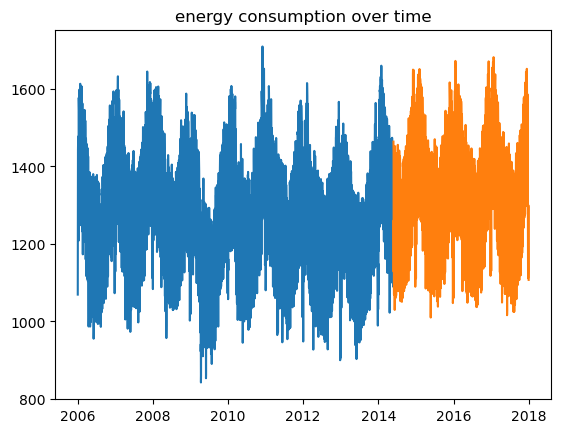

In [157]:
plt.plot(train.consumption)
plt.plot(test.consumption)
plt.title('energy consumption over time')
plt.show()

## Viz

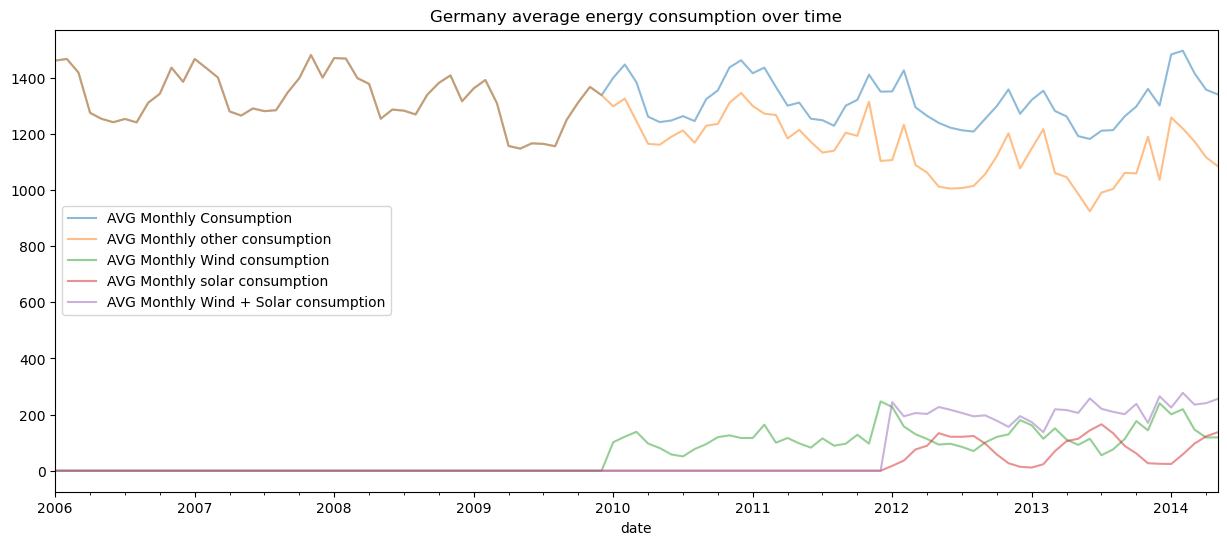

In [158]:
plt.figure(figsize=(15, 6))
train.consumption.resample('M').mean().plot(alpha=.5, label='AVG Monthly Consumption')
train.other.resample('M').mean().plot(alpha=.5, label='AVG Monthly other consumption')
train.wind.resample('M').mean().plot(alpha=.5, label='AVG Monthly Wind consumption')
train.solar.resample('M').mean().plot(alpha=.5, label='AVG Monthly solar consumption')
train['wind+solar'].resample('M').mean().plot(alpha=.5, label='AVG Monthly Wind + Solar consumption')
plt.title('Germany average energy consumption over time')
plt.legend()
plt.show()

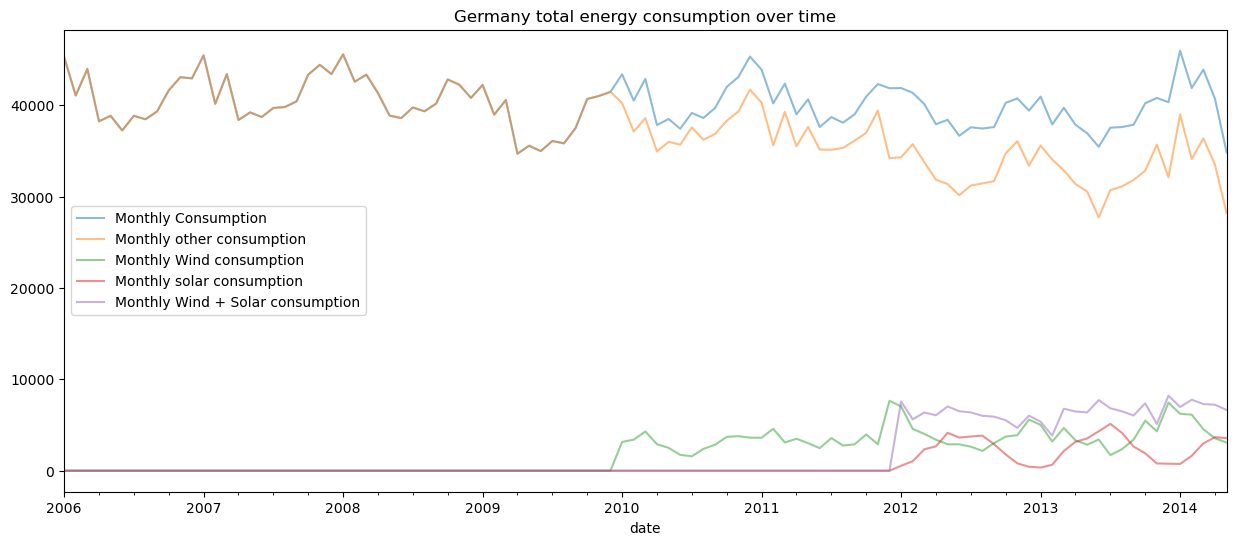

In [159]:
plt.figure(figsize=(15, 6))
train.consumption.resample('M').sum().plot(alpha=.5, label='Monthly Consumption')
train.other.resample('M').sum().plot(alpha=.5, label='Monthly other consumption')
train.wind.resample('M').sum().plot(alpha=.5, label='Monthly Wind consumption')
train.solar.resample('M').sum().plot(alpha=.5, label='Monthly solar consumption')
train['wind+solar'].resample('M').sum().plot(alpha=.5, label='Monthly Wind + Solar consumption')
plt.title('Germany total energy consumption over time')
plt.legend()
plt.show()

In [161]:
train[:1]

,consumption,wind,solar,wind+solar,month,year,other
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006,1069.184


In [163]:
train[3067:3068]

,consumption,wind,solar,wind+solar,month,year,other
date,,,,,,,
2014-05-26,1429.811,138.365,137.176,275.541,5,2014,1154.27


360.6269999999997

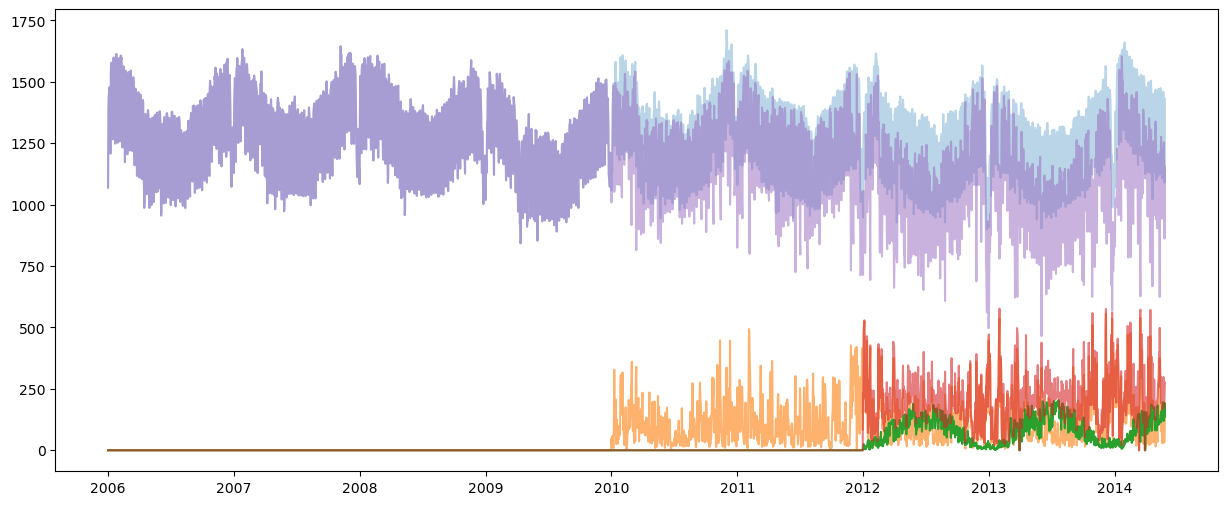

In [174]:
plt.figure(figsize=(15,6))
plt.plot(train.consumption, alpha=.3)
plt.plot(train.wind, alpha=.6)
plt.plot(train.solar)
plt.plot(train['wind+solar'], alpha=.6)
plt.plot(train.other, alpha=.5)